<img src='https://sprcdn-assets.sprinklr.com/674/8b955864-7307-4d41-8ded-c194170f5305-2729152590.jpg' alt="Alt Text" style="height: 250px; width: 1000px;">

# Extracted Data of Top 250 Movies from IMDB Website

In [1]:
import requests
from bs4 import BeautifulSoup
import bs4
from bs4 import BeautifulSoup

url = 'https://www.imdb.com/chart/top/'
#As the server refuse to authorize request so created user header
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}

response = requests.get(url, headers=headers)

if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')

else:
    print(f"Error: {response.status_code}")


In [2]:
# Find the movie containers
containers = soup.find_all('li', class_ = 'ipc-metadata-list-summary-item')
type(containers), len(containers)

(bs4.element.ResultSet, 250)

In [3]:
# Lists to store Movie Title, Stars, and Ratings, Release Year
movie_title = []
movie_stars = []
movie_ratings = []
release_year = []
movie_duration = []
movie_url = []

# Extract Movie information
for container in containers:
    #Extracting movie title
    title = container.find('h3', class_ = 'ipc-title__text').text.strip().split('.')[1]
    movie_title.append(title)
    
    #Extracting movie stars
    stars = container.find('span', class_ = 'ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating').text.strip()[0:4]
    movie_stars.append(stars)
    
    Extracting moview ratings
    ratings = container.find('span', class_ = 'ipc-rating-star--voteCount').text.strip().replace('(','').replace(')','').replace('K', '000').replace('M', '00000').replace('.','')
    movie_ratings.append(ratings)
    
    #Extracting movie release year
    year = container.find('span', class_ = 'sc-479faa3c-8 bNrEFi dli-title-metadata-item').text
    release_year.append(year)
    
    #Extracting movie duration 
    duration = container.find_all('span', class_ = 'sc-479faa3c-8 bNrEFi cli-title-metadata-item')[1].text
    movie_duration.append(duration)
    
    #Extracting imageURl 
    url = container.find('a', class_ = 'ipc-lockup-overlay ipc-focusable').get('href')
    domain = 'https://www.imdb.com'
    url_link = domain + url
    movie_url.append(url_link)


In [4]:
data = {"movie_title": movie_title,
     "movie_stars": movie_stars,
     "movie_ratings": movie_ratings,
     "release_year": release_year,
     "movie_duration": movie_duration,
     "movie_url": movie_url
    }

df = pd.DataFrame(data)

In [5]:
df.to_csv('Top250_movies.csv')

## Exploratory Data Analysis (EDA)

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [7]:
df1 = pd.read_csv('C:\\Users\\rm217\\OneDrive\\Desktop\\Python\\Complete Python\\Web Srapping\\Top250_movies.csv', encoding='unicode_escape')


In [8]:
df1.head()

,Unnamed: 0,movie_title,movie_stars,movie_ratings,release_year,movie_duration,movie_url
0,0,The Shawshank Redemption,9.3,2800000,1994,2h 22m,https://www.imdb.com/title/tt0111161/?ref_=cht...
1,1,The Godfather,9.2,200000,1972,2h 55m,https://www.imdb.com/title/tt0068646/?ref_=cht...
2,2,The Dark Knight,9.0,2800000,2008,2h 32m,https://www.imdb.com/title/tt0468569/?ref_=cht...
3,3,The Godfather: Part II,9.0,1300000,1974,3h 22m,https://www.imdb.com/title/tt0071562/?ref_=cht...
4,4,12 Angry Men,9.0,843000,1957,1h 36m,https://www.imdb.com/title/tt0050083/?ref_=cht...


In [9]:
df1.shape

(250, 7)

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      250 non-null    int64 
 1   movie_title     250 non-null    object
 2   movie_stars     250 non-null    object
 3   movie_ratings   250 non-null    int64 
 4   release_year    250 non-null    int64 
 5   movie_duration  250 non-null    object
 6   movie_url       250 non-null    object
dtypes: int64(3), object(4)
memory usage: 13.8+ KB


In [11]:
df1['movie_stars']

0      9.3 
1      9.2 
2      9.0 
3      9.0 
4      9.0 
       ... 
245    8.1 
246    8.0 
247    8.0 
248    8.1 
249    8.0 
Name: movie_stars, Length: 250, dtype: object

In [12]:
#change datatype of moive movie stars column
df1['movie_stars'] = df1['movie_stars'].astype('float')

In [13]:
#Updated data columns
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      250 non-null    int64  
 1   movie_title     250 non-null    object 
 2   movie_stars     250 non-null    float64
 3   movie_ratings   250 non-null    int64  
 4   release_year    250 non-null    int64  
 5   movie_duration  250 non-null    object 
 6   movie_url       250 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 13.8+ KB


In [14]:
#Checking the null values in data
df1.isnull().sum()

#Used to remove duplicates
# df1.dropna()

Unnamed: 0        0
movie_title       0
movie_stars       0
movie_ratings     0
release_year      0
movie_duration    0
movie_url         0
dtype: int64

In [15]:
#To check duplicate entries
df1.duplicated()

#Used to drop duplicates
# df1.drop_duplicates().head()

0      False
1      False
2      False
3      False
4      False
       ...  
245    False
246    False
247    False
248    False
249    False
Length: 250, dtype: bool

In [16]:
df1.describe(include = 'all')

,Unnamed: 0,movie_title,movie_stars,movie_ratings,release_year,movie_duration,movie_url
count,250.000000,250,250.00000,2.500000e+02,250.000000,250,250
unique,NaN,250,NaN,NaN,NaN,102,250
top,NaN,The Shawshank Redemption,NaN,NaN,NaN,2h 10m,https://www.imdb.com/title/tt0111161/?ref_=cht...
freq,NaN,1,NaN,NaN,NaN,9,1
mean,124.500000,NaN,8.30560,6.256360e+05,1986.716000,NaN,NaN
std,72.312977,NaN,0.23174,5.266061e+05,25.324785,NaN,NaN
min,0.000000,NaN,8.00000,3.700000e+04,1921.000000,NaN,NaN
25%,62.250000,NaN,8.10000,2.000000e+05,1966.250000,NaN,NaN
50%,124.500000,NaN,8.20000,4.570000e+05,1994.000000,NaN,NaN
75%,186.750000,NaN,8.40000,8.947500e+05,2007.000000,NaN,NaN


###  Movie with highest rating

In [17]:
df1[df1['movie_ratings'] == max(df1['movie_ratings'])]

,Unnamed: 0,movie_title,movie_stars,movie_ratings,release_year,movie_duration,movie_url
0,0,The Shawshank Redemption,9.3,2800000,1994,2h 22m,https://www.imdb.com/title/tt0111161/?ref_=cht...
2,2,The Dark Knight,9.0,2800000,2008,2h 32m,https://www.imdb.com/title/tt0468569/?ref_=cht...


In [18]:
#Top 5 movies with highest ratings
top5_rated_movies = df1.sort_values('movie_ratings', ascending = False).head(5)
top5_rated_movies

,Unnamed: 0,movie_title,movie_stars,movie_ratings,release_year,movie_duration,movie_url
0,0,The Shawshank Redemption,9.3,2800000,1994,2h 22m,https://www.imdb.com/title/tt0111161/?ref_=cht...
2,2,The Dark Knight,9.0,2800000,2008,2h 32m,https://www.imdb.com/title/tt0468569/?ref_=cht...
13,13,Inception,8.8,2500000,2010,2h 28m,https://www.imdb.com/title/tt1375666/?ref_=cht...
11,11,Fight Club,8.8,2300000,1999,2h 19m,https://www.imdb.com/title/tt0137523/?ref_=cht...
10,10,Forrest Gump,8.8,2200000,1994,2h 22m,https://www.imdb.com/title/tt0109830/?ref_=cht...


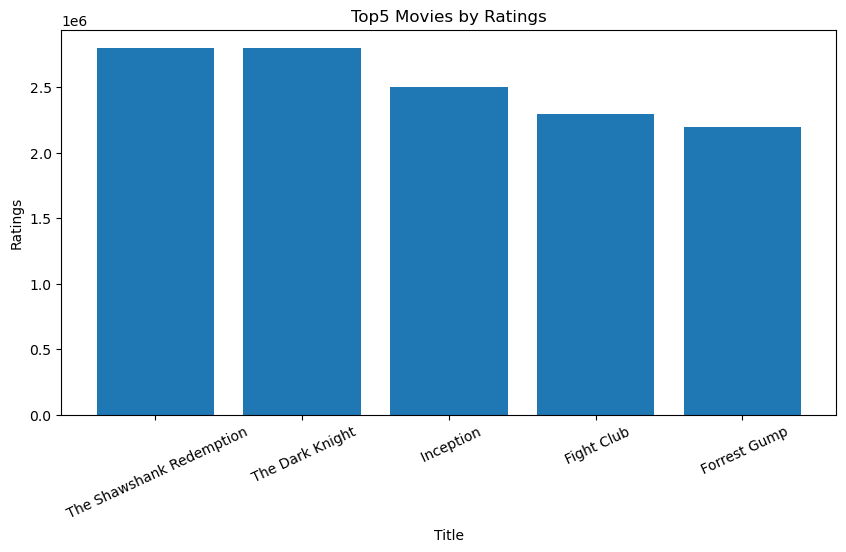

In [19]:
#Visualization
plt.figure(figsize = (10,5))
plt.bar(x = 'movie_title', height = 'movie_ratings', data = top5_rated_movies)
plt.title('Top5 Movies by Ratings')
plt.xlabel('Title')
plt.ylabel('Ratings')
plt.xticks(rotation = 25)
plt.show()

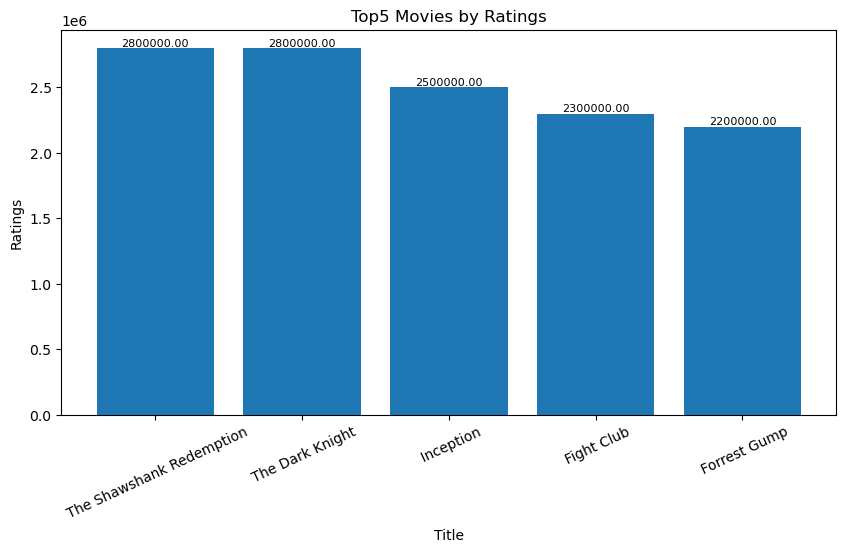

In [20]:
#Visualization with bar labels
plt.figure(figsize = (10,5))
bars = plt.bar(x = 'movie_title', height = 'movie_ratings', data = top5_rated_movies)
# plt.bar_label(bars)
plt.bar_label(bars, fmt='%.2f', label_type='edge', fontsize=8)
plt.title('Top5 Movies by Ratings')
plt.xlabel('Title')
plt.ylabel('Ratings')
plt.xticks(rotation = 25)
plt.show()

### Movies released in 2000

In [21]:
df1[df1['release_year'] == 2000]

,Unnamed: 0,movie_title,movie_stars,movie_ratings,release_year,movie_duration,movie_url
35,35,Gladiator,8.5,1600000,2000,2h 35m,https://www.imdb.com/title/tt0172495/?ref_=cht...
55,55,Memento,8.4,1300000,2000,1h 53m,https://www.imdb.com/title/tt0209144/?ref_=cht...
88,88,Requiem for a Dream,8.3,883000,2000,1h 42m,https://www.imdb.com/title/tt0180093/?ref_=cht...
119,119,Snatch,8.2,894000,2000,1h 44m,https://www.imdb.com/title/tt0208092/?ref_=cht...
237,237,Amores perros,8.1,250000,2000,2h 34m,https://www.imdb.com/title/tt0245712/?ref_=cht...


### Movies released in 2000 and has ratings more than 1000000

In [22]:
df1[(df1['release_year'] == 2000) & (df1['movie_ratings'] >1000000)]

,Unnamed: 0,movie_title,movie_stars,movie_ratings,release_year,movie_duration,movie_url
35,35,Gladiator,8.5,1600000,2000,2h 35m,https://www.imdb.com/title/tt0172495/?ref_=cht...
55,55,Memento,8.4,1300000,2000,1h 53m,https://www.imdb.com/title/tt0209144/?ref_=cht...


### How many movies released each year in top 250 movies

In [23]:
df1.value_counts('release_year', ascending = False)

#df1.release_year.value_counts().sort_values(ascending = False)

release_year
1995    8
2004    7
2003    6
2009    6
1957    6
       ..
1972    1
1977    1
1978    1
1924    1
1921    1
Length: 87, dtype: int64

### Top 10 years with highest movie release

In [24]:
top10_releaseYear = df1.value_counts('release_year', ascending = False).head(10)

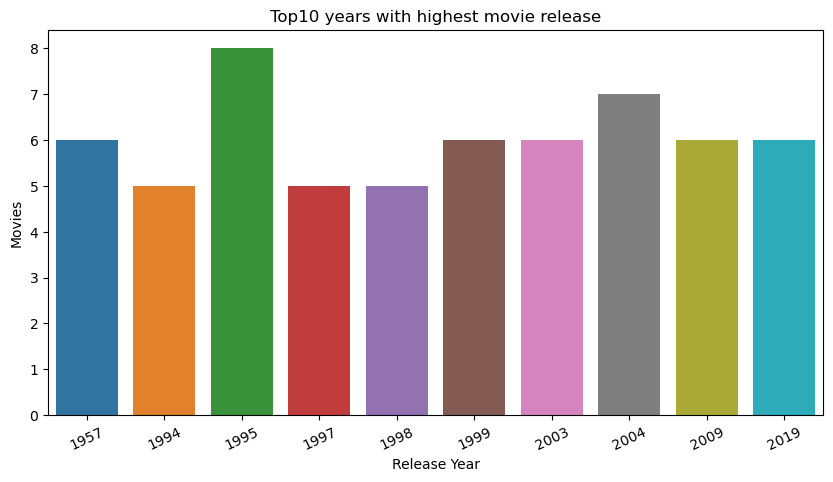

In [25]:
#Visualization
plt.figure(figsize = (10, 5) )
sns.barplot(x = top10_releaseYear.index, y = top10_releaseYear.values)
plt.title('Top10 years with highest movie release')
plt.xlabel('Release Year')
plt.ylabel('Movies')
plt.xticks(rotation = 25)
plt.show()

## Movie Recommendation based on year and stars

In [26]:
Year = int(input('Release Year: '))
stars = float(input('Movie stars should be or more than: '))

Release Year: 1995
Movie stars should be or more than: 8.5


In [27]:
df1[(df1['release_year'] == Year) & (df1['movie_stars'] >= stars)]

,Unnamed: 0,movie_title,movie_stars,movie_ratings,release_year,movie_duration,movie_url
18,18,Se7en,8.6,1800000,1995,2h 7m,https://www.imdb.com/title/tt0114369/?ref_=cht...
43,43,The Usual Suspects,8.5,1100000,1995,1h 46m,https://www.imdb.com/title/tt0114814/?ref_=cht...
